# Lichess Game Dataset - Datascience project

Il dataset contiene più di 20'000 partite di scacchi prese da una selezione di utenti dal sito lichess.org.
Molte informazioni possono essere analizzate da una partita e questo ci dà la possibilità di effettuare diverse analisi. <br>
Il file è reperibile cliccando [qui](https://www.kaggle.com/datasnaek/chess).

## Modifiche rispetto alla presentazione
* Aggiunto [__Analisi vittorie rispetto differenza rating__](#winsbyratingdiff)
* Aggiunto [__Analisi partite con turni bassi__](#lowturns)

## Dataset

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("games.csv")

In [3]:
df

id  rated    created_at  last_move_at  turns victory_status  \
0      TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime   
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
...         ...    ...           ...           ...    ...            ...   
20053  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
20054  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
20055  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
20056  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
20057  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner increment_code       white_id  white_rating            black_id  \
0      white           15+2       bourgris          1500                a-00   
1      black           5+10           a-00          1322           skinnerua   
2      white           5+10         ischia          1496                a-00   
3      white           20+0  daniamurashov          1439        adivanov2009   
4      white           30+3      nik221107          1523        adivanov2009   
...      ...            ...            ...           ...                 ...   
20053  white          10+10        belcolt          1691            jamboger   
20054  black           10+0       jamboger          1233  farrukhasomiddinov   
20055  white           10+0       jamboger          1219        schaaksmurf3   
20056  white           10+0   marcodisogno          1360            jamboger   
20057  black           10+0       jamboger          1235               ffbob   

       black_rating                                              moves  \
0              1191  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1              1261  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2              1500  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3              1454  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4              1469  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   
...             ...                                                ...   
20053          1220  d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...   
20054          1196  d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...   
20055          1286  d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...   
20056          1227  e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...   
20057          1339  d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...   

      opening_eco                            opening_name  opening_ply  
0             D10        Slav Defense: Exchange Variation            5  
1             B00  Nimzowitsch Defense: Kennedy Variation            4  
2             C20   King's Pawn Game: Leonardis Variation            3  
3             D02  Queen's Pawn Game: Zukertort Variation            3  
4             C41                        Philidor Defense            5  
...           ...                                     ...          ...  
20053         A80                           Dutch Defense            2  
20054         A41                            Queen's Pawn            2  
20055         D00         Queen's Pawn Game: Mason Attack            3  
20056         B07                            Pirc Defense            4  
20057         D00         Queen's Pawn Game: Mason Attack            3  

[20058 rows x 16 columns]

## Colonne (16):

- __Game ID:__ str
- __Rated (T/F):__ bool
    - Partita classificata? (Vincita/Perdita di elo)
- __Start Time:__ float64
- __End Time:__ float64
- __Number of Turns:__ int64
- __Game Status:__ str
    - Com'è finita la partita?
- __Winner:__ str
    - Che colore ha vinto?
- __Time Increment:__ str
- __White Player ID:__ str
- __White Player Rating:__ int64
- __Black Player ID:__ str
- __Black Player Rating:__ int64
- __All Moves in Standard Chess Notation:__ str
- __Opening Eco (Codice standard per ogni opener, [lista qui](https://www.365chess.com/eco.php)):__ str
- __Opening Name:__ str
- __Opening Ply (Numero di mosse nella fase di opening):__ int64

### Percentuale di partite rated

Per capire bene che tipo di partite verranno analizzate, è interessante sapere la percentuale di partite classificate o no. <br>
Dal grafico a torta è possibile vedere che l'80%~ è composto da partite rated (classificate).

In [4]:
rated_counts = df["rated"].apply(lambda x: "Rated" if x==True else "Unrated")
fig = px.pie(rated_counts, names="rated", title="Percentage of rated games")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    autosize=False,
    width=500,
    height=500)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Distribuzione tipo di vittoria

Un'altra analisi curiosa è il come finisce una partita.<br>
La maggior parte dei match finisce con la resa da parte di uno dei giocatori anziché uno scacco matto come ci si potrebbe magari aspettare.

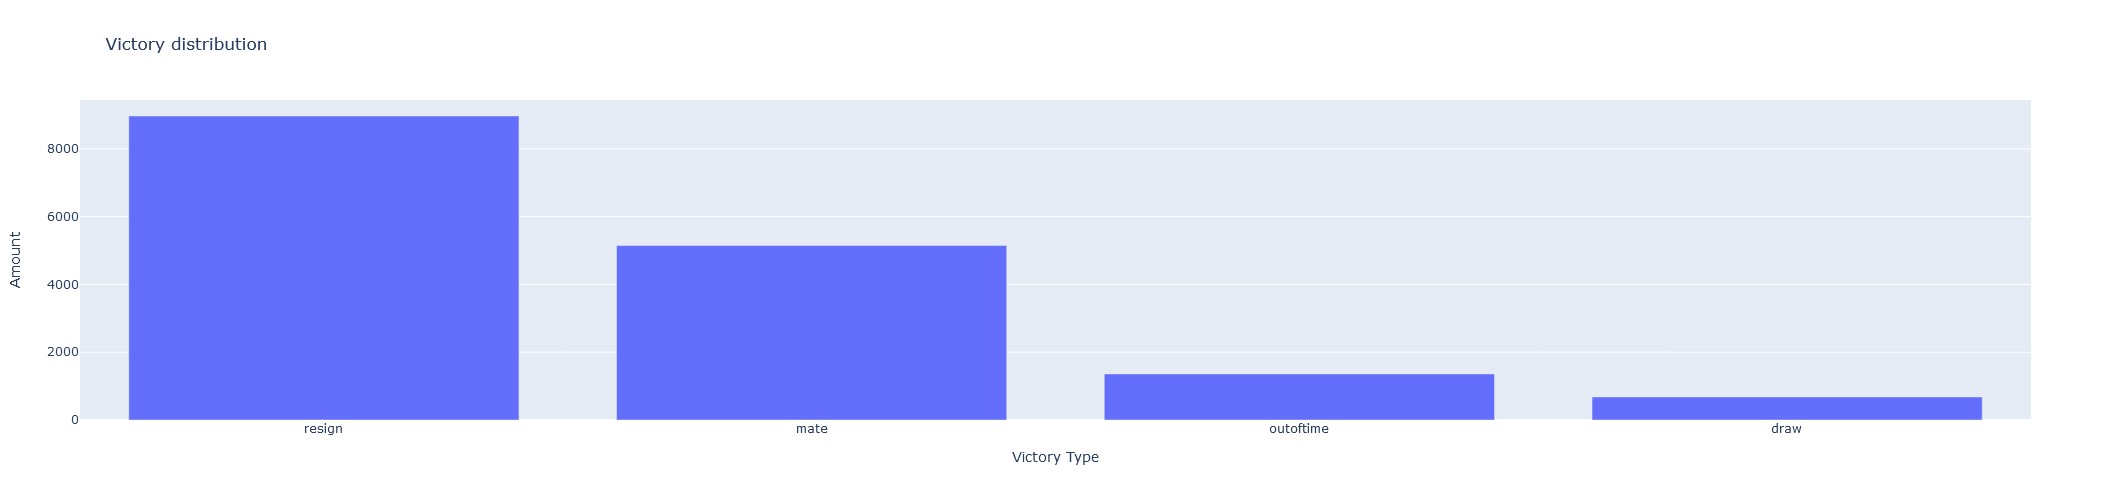

In [ ]:
tidy = df.groupby("victory_status").sum().reset_index()
fig = px.bar(tidy, x="victory_status", y="rated", title="Victory distribution", labels={"victory_status": "Victory Type", "rated":"Amount"})
fig.update_layout(autosize=False, width=500, height=500, xaxis={'categoryorder':'total descending'})
fig.show()

## Distribuzione del numero di turni

Uno studio interessante che ho voluto fare è vedere quante partite vengono concluse entro un certo numero di turni. <br>
Si può notare  come la maggior parte delle partite finisce entro i 60-70 turni circa.

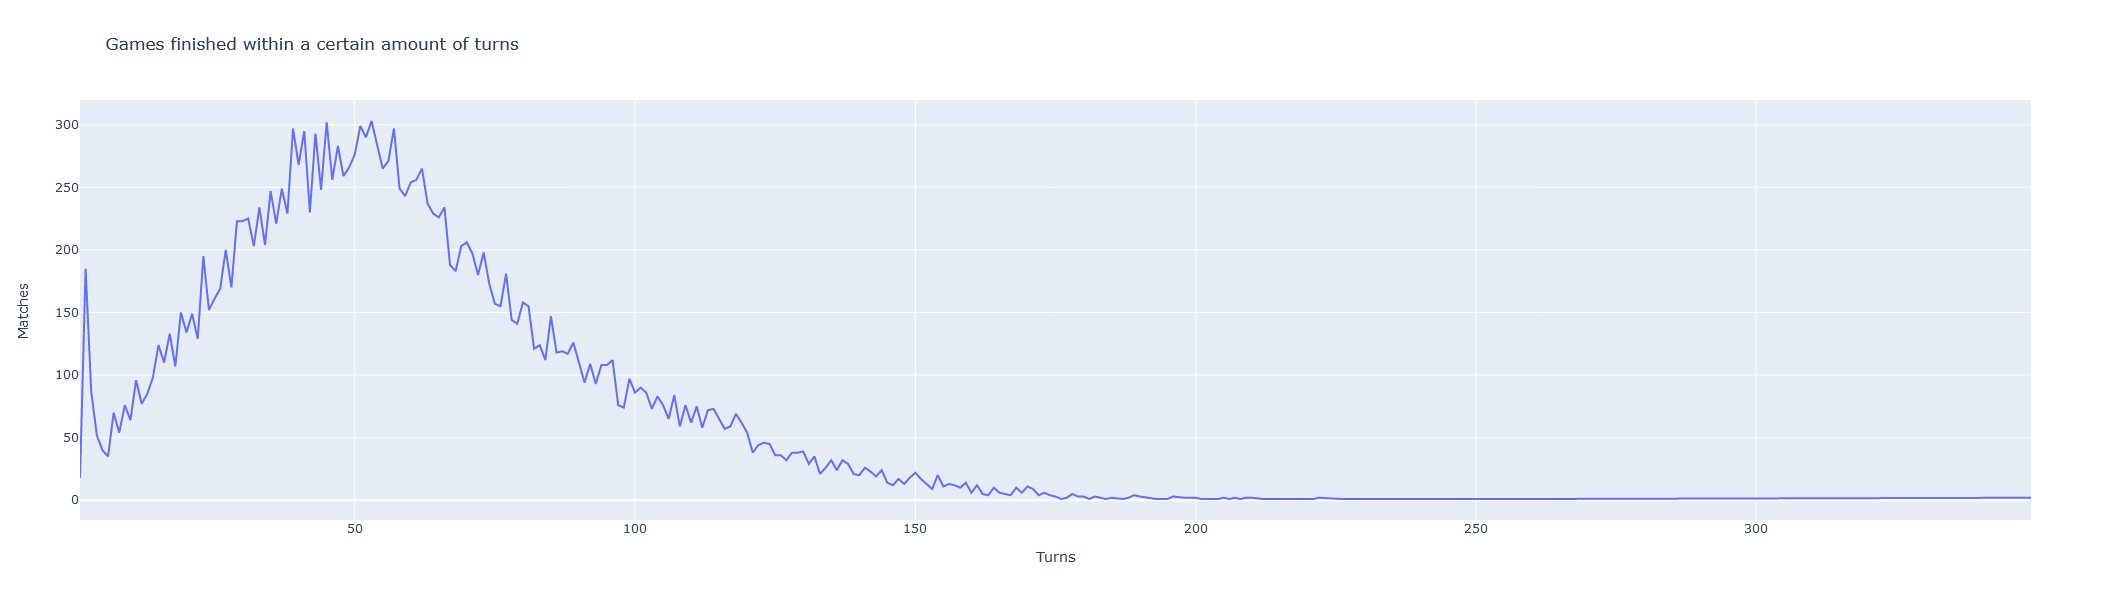

In [ ]:
turnDiff = df.groupby("turns")["id"].count()
fig = px.line(turnDiff, title="Games finished within a certain amount of turns", labels={"value":"Matches", "turns":"Turns"})
fig.update_layout(autosize=False, width=1200, height=600, showlegend=False)
fig.show()

<a id="lowturns"></a>
Ci sono però molte partite che finiscono con un numero di turni molto basso. <br>
Dall'istogramma seguente possiamo vedere come nelle partite con turni minori o uguali a 5, la maggior parte finisce per resa o per tempo scaduto. <br>
Se è per resa immagino che sia dovuto all'abbandono improvviso di un giocatore, magari perché chiude la pagina o semplicemente non ha più voglia di giocare, o magri commette un errore nelle prime mosse e decide di arrendersi.

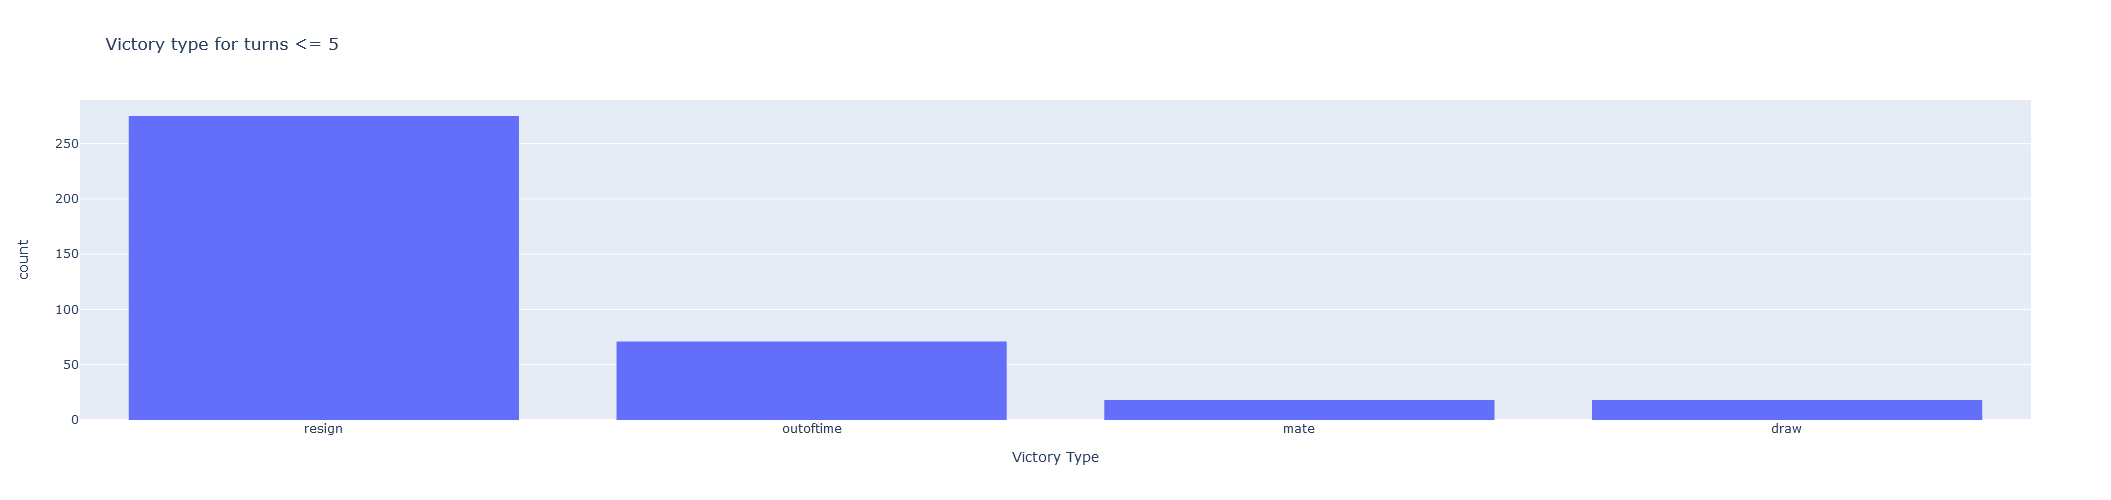

In [ ]:
turnsOrdered = df.sort_values(by="turns")
mask = turnsOrdered["turns"] <= 5
lowTurns = turnsOrdered[mask]
lowTurns
fig = px.histogram(lowTurns, x="victory_status", title="Victory type for turns <= 5", labels={"victory_status": "Victory Type", "rated":"Amount"})
fig.update_layout(autosize=False, width=500, height=500, xaxis={'categoryorder':'total descending'})
fig.show()

## Rating brackets
È interessante vedere la media di rating per ogni partita.
Cominciamo a calcolare la media minima e massima:

In [ ]:
df["avg_rating"] = (df["black_rating"] + df["white_rating"])/2
print("avg min rating:", df["avg_rating"].min())
print("avg max rating:", df["avg_rating"].max())

avg min rating: 816.5
avg max rating: 2475.5


Il grafico seguente mostra la media di rating tra i giocatori per ogni partita. <br>
È importante notare però che ci sono partite dove la disparità di elo è notevole, ad esempio se in un game il giocatore nero ha 2000 di rating e il bianco 1500, si ritroveranno nel bracket [1700-1800].<br>
Questo quindi non mostra necessariamente il livello di abilità del giocatore.

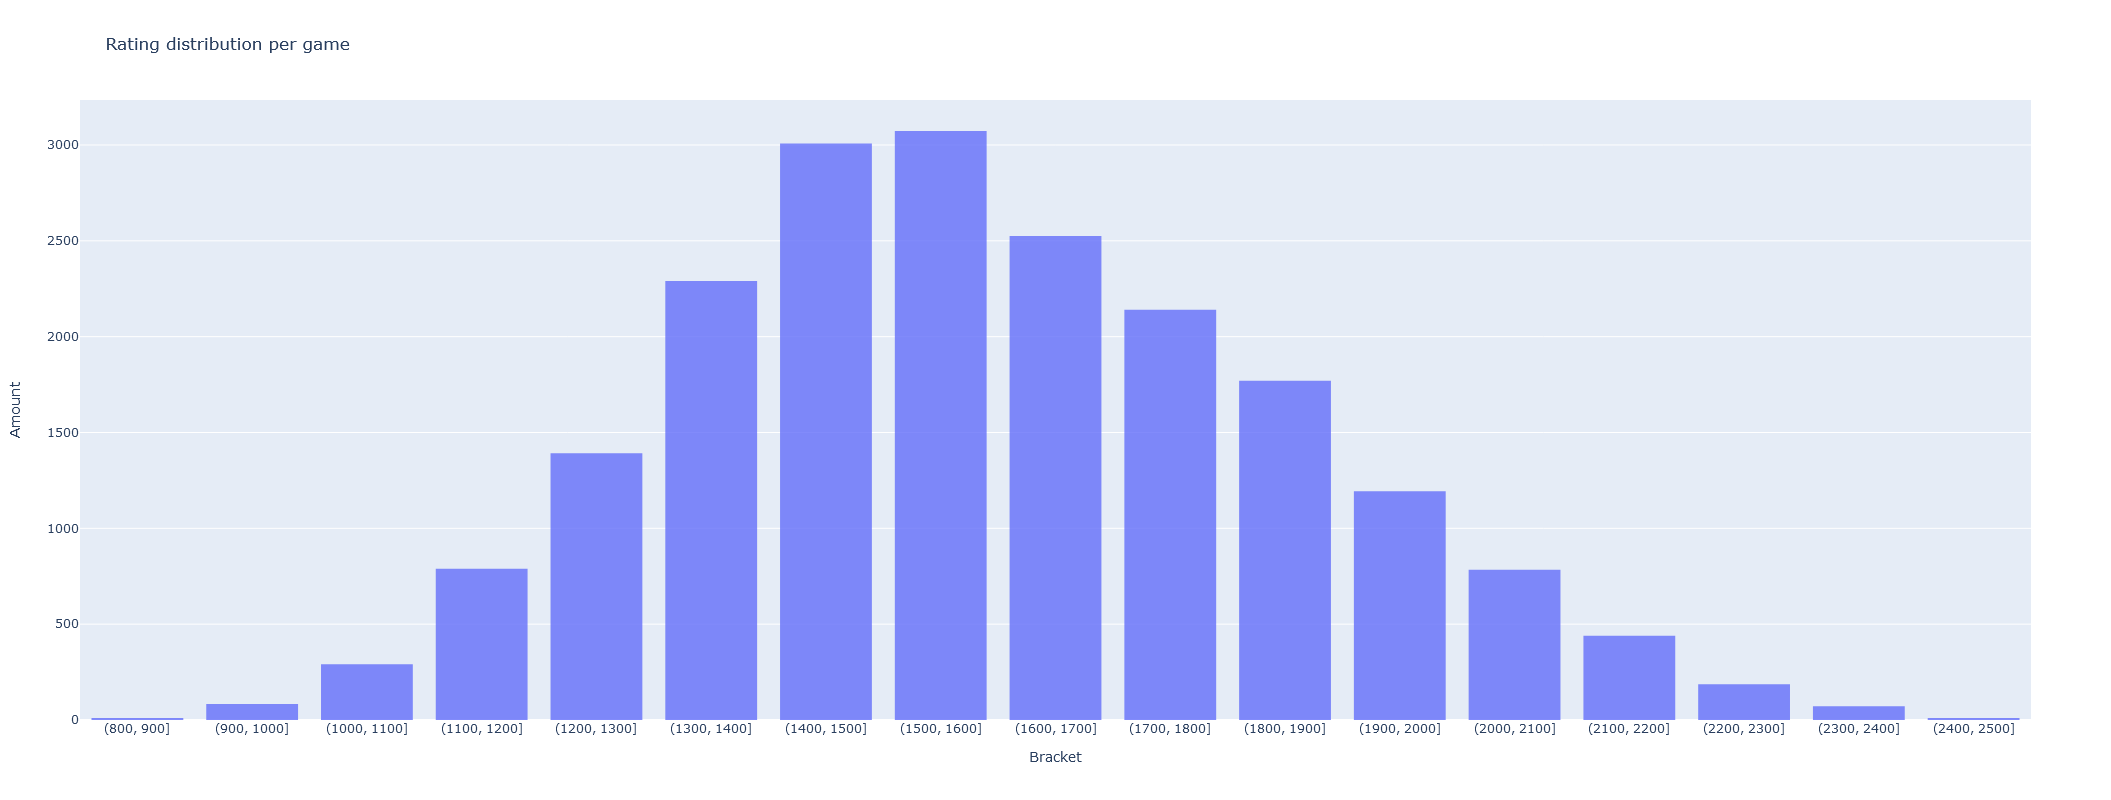

In [ ]:
brackets = np.arange(800, 2501, 100)
df["bracket"] = pd.cut(df["avg_rating"], bins = brackets)
df["bracket_str"] = df["bracket"].astype(str)
fig = px.histogram(df, "bracket_str", title="Rating distribution per game", opacity=0.8, category_orders=dict(bracket_str = df["bracket"].dtype.categories.astype(str)), labels={"bracket_str":"Bracket"})
fig.update_layout(autosize=False, width=1200, height=800, yaxis_title="Amount")
fig.show()

## Matchmaking fairness

Quest'analisi ha lo scopo di vedere se il sito di lichess mette i giocatori uno contro l'altro in maniera equilibrata, mantenendo quindi una differenza di rating tra i due non troppo elevata.<br>
Comincio prima con fare una distribuzione di rating sia per il bianco che per il nero. Il 1500 è così elevato perché quando un account viene creato sul sito, gli viene assegnato un rating base di 1500.

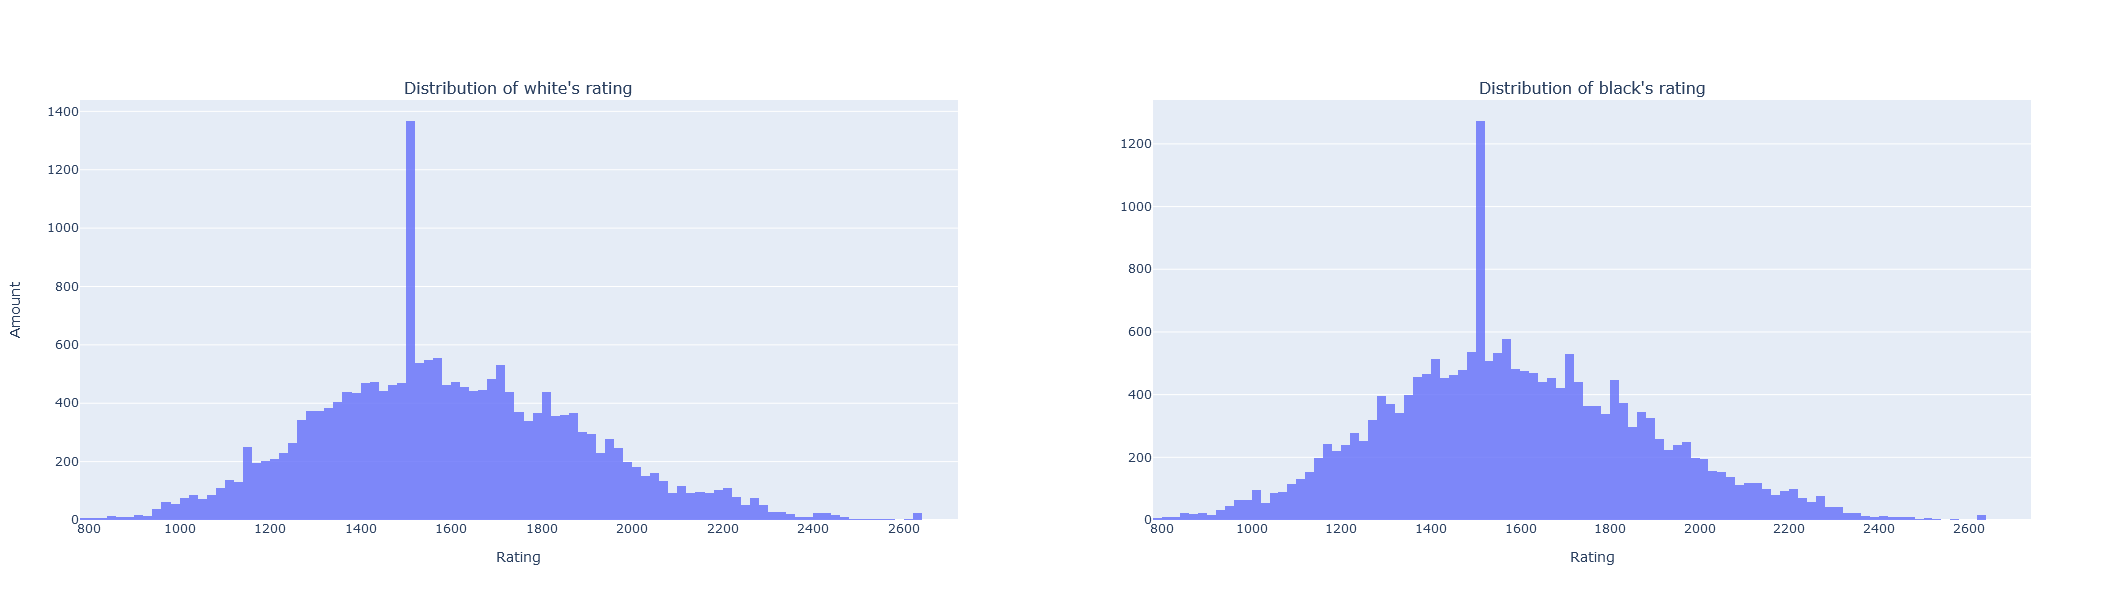

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Distribution of white's rating", "Distribution of black's rating"))
fig.add_trace(
    px.histogram(df["white_rating"], nbins=100, opacity=0.8).data[0],
    row=1, col=1
)

fig.add_trace(
    px.histogram(df["black_rating"], nbins=100, opacity=0.8).data[0],
    row=1, col=2
)

fig['layout']['xaxis']['title'] = "Rating"
fig['layout']['yaxis']['title'] = "Amount"
fig['layout']['xaxis2']['title'] = "Rating"
fig.update_layout(height=600, width=1200, showlegend=False)
fig.show()

### Distribuzione differenza rating

Qui è possibile vedere la distribuzione della differenza di rating, facendo rating del bianco meno quello del nero.<br>
Salvo qualche caso possiamo quindi dire che le partite sono abbastanza equilibrate.<br>
Bisogna inoltre considerare che vengono tenute conto le partite non rated. Quindi potrebbero esserci partite amichevoli con una notevole differenza di elo.

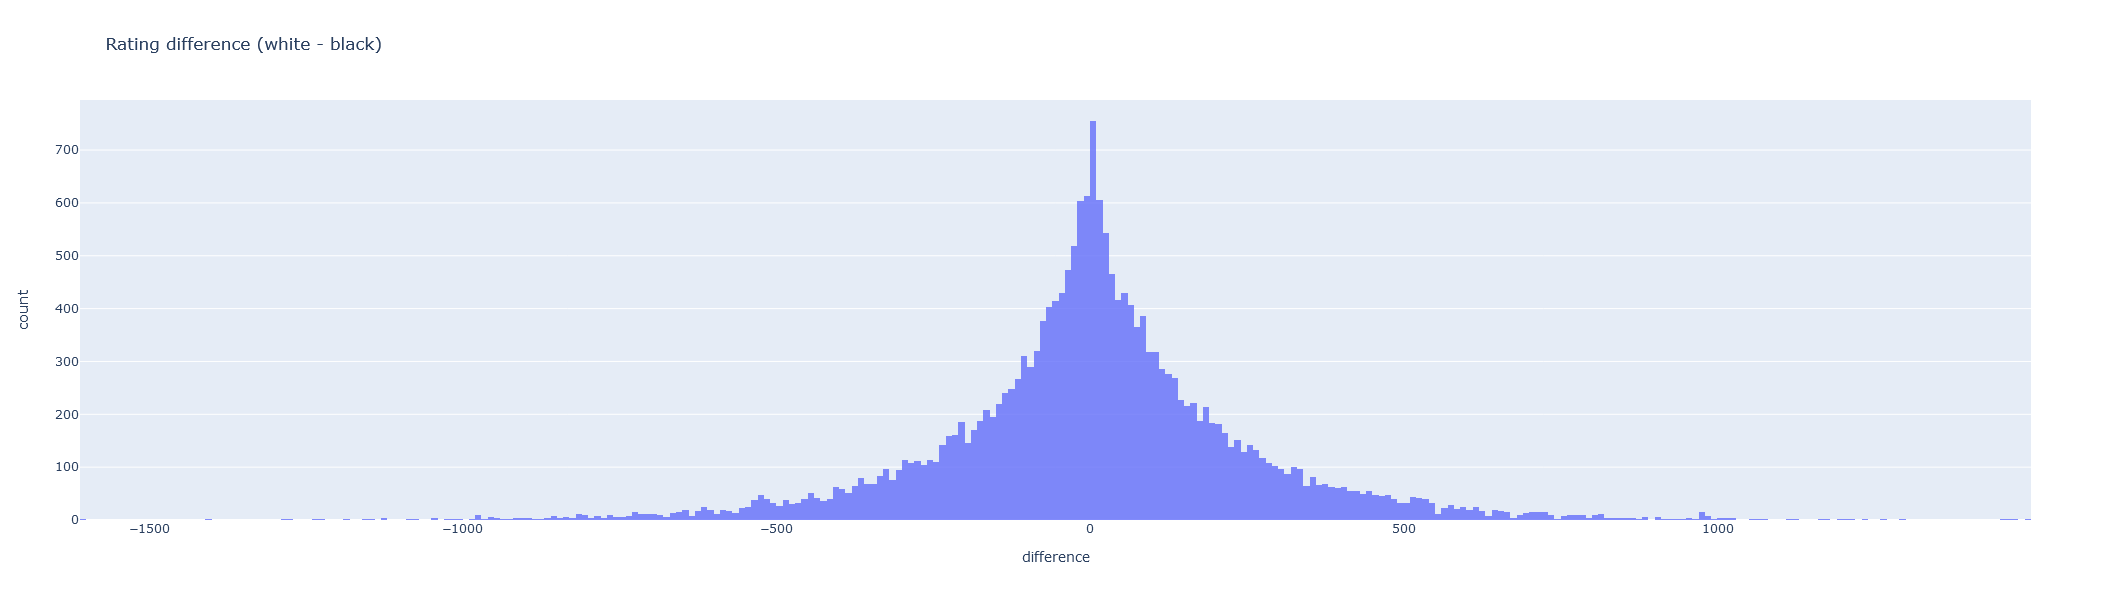

In [ ]:
df["rating_diff"] = df["white_rating"] - df["black_rating"]
fig = px.histogram(df["rating_diff"], opacity=0.8, title="Rating difference (white - black)", labels={"value":"difference"})
fig.update_layout(autosize=False, width=900, height=600, showlegend=False)
fig.show()

Con questo scatter plot possiamo fare un'ulteriore verifica mettendo a confronto il rating del nero con quello del bianco.

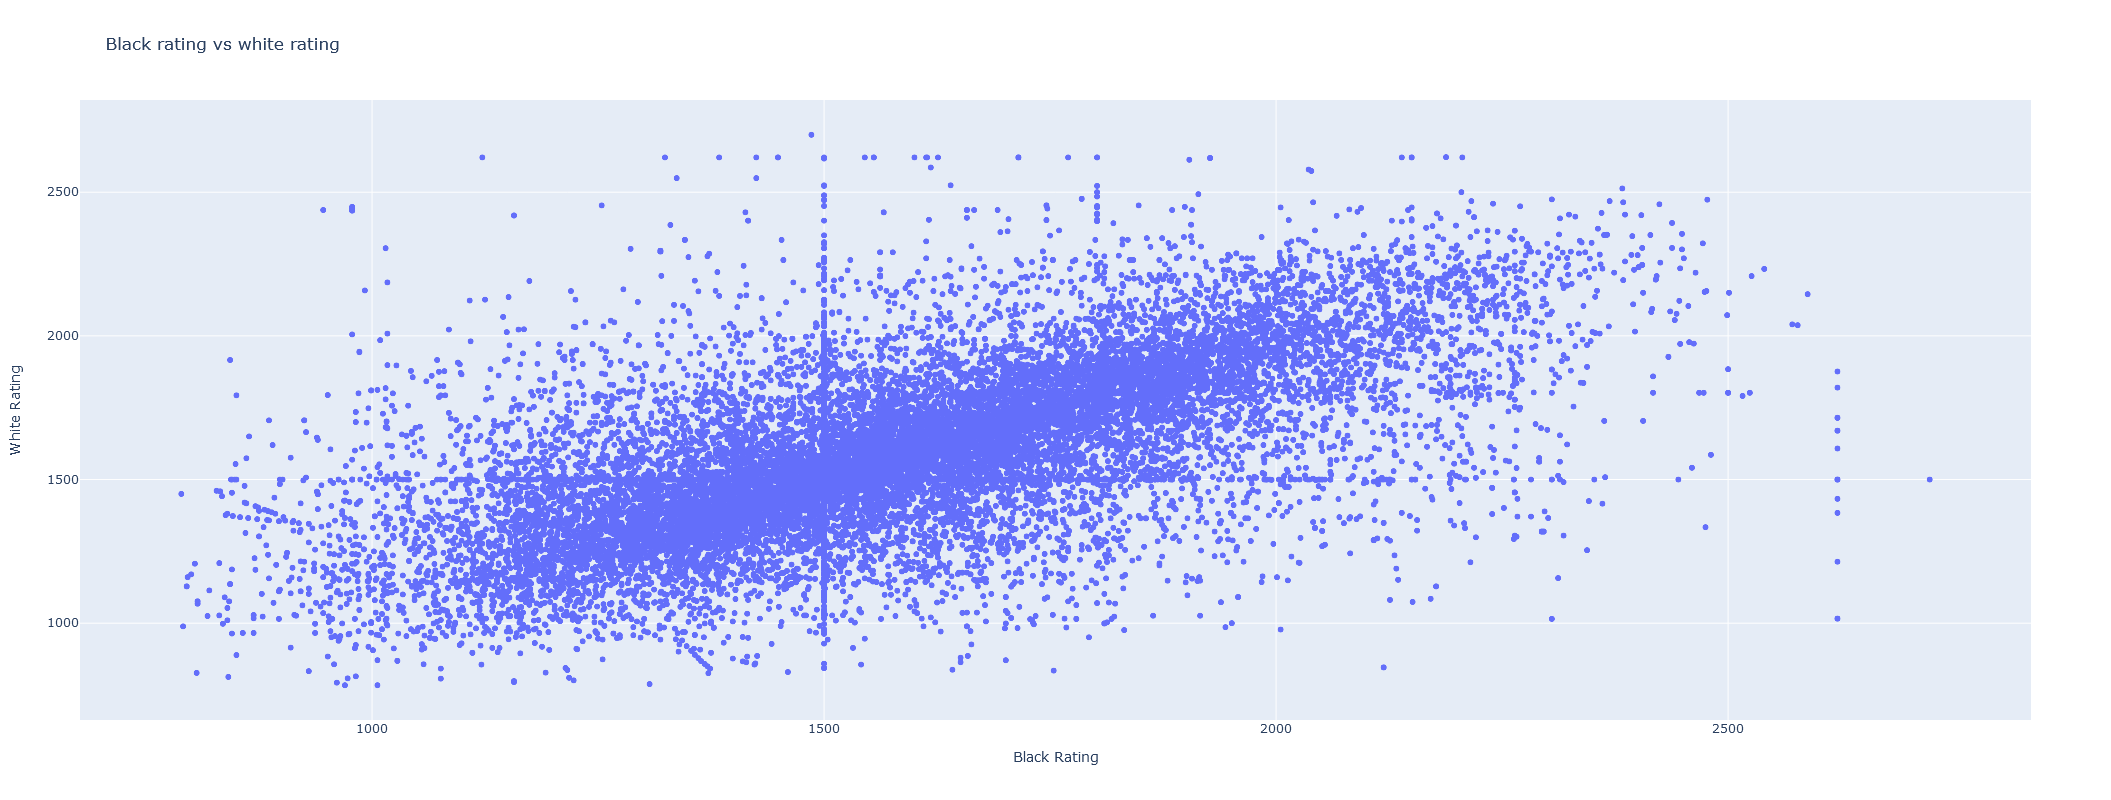

In [ ]:
fig = px.scatter(df, x="black_rating", y="white_rating", labels={"white_rating":"White Rating", "black_rating":"Black Rating"}, title="Black rating vs white rating")
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

<a id='winsbyratingdiff'></a>
## Vittorie in base alla differenza di rating
Per quest'analisi ho diviso prima la differenza di rating in diversi brackets.<br>
Il grafico a sinitra mostra la quantità di partite vinte per bracket di differenza di rating.
Il grafico a destra invece mostra quante partite vince il bianco.<br>
NB: non sono riuscito a sovrapporre i grafici purtroppo

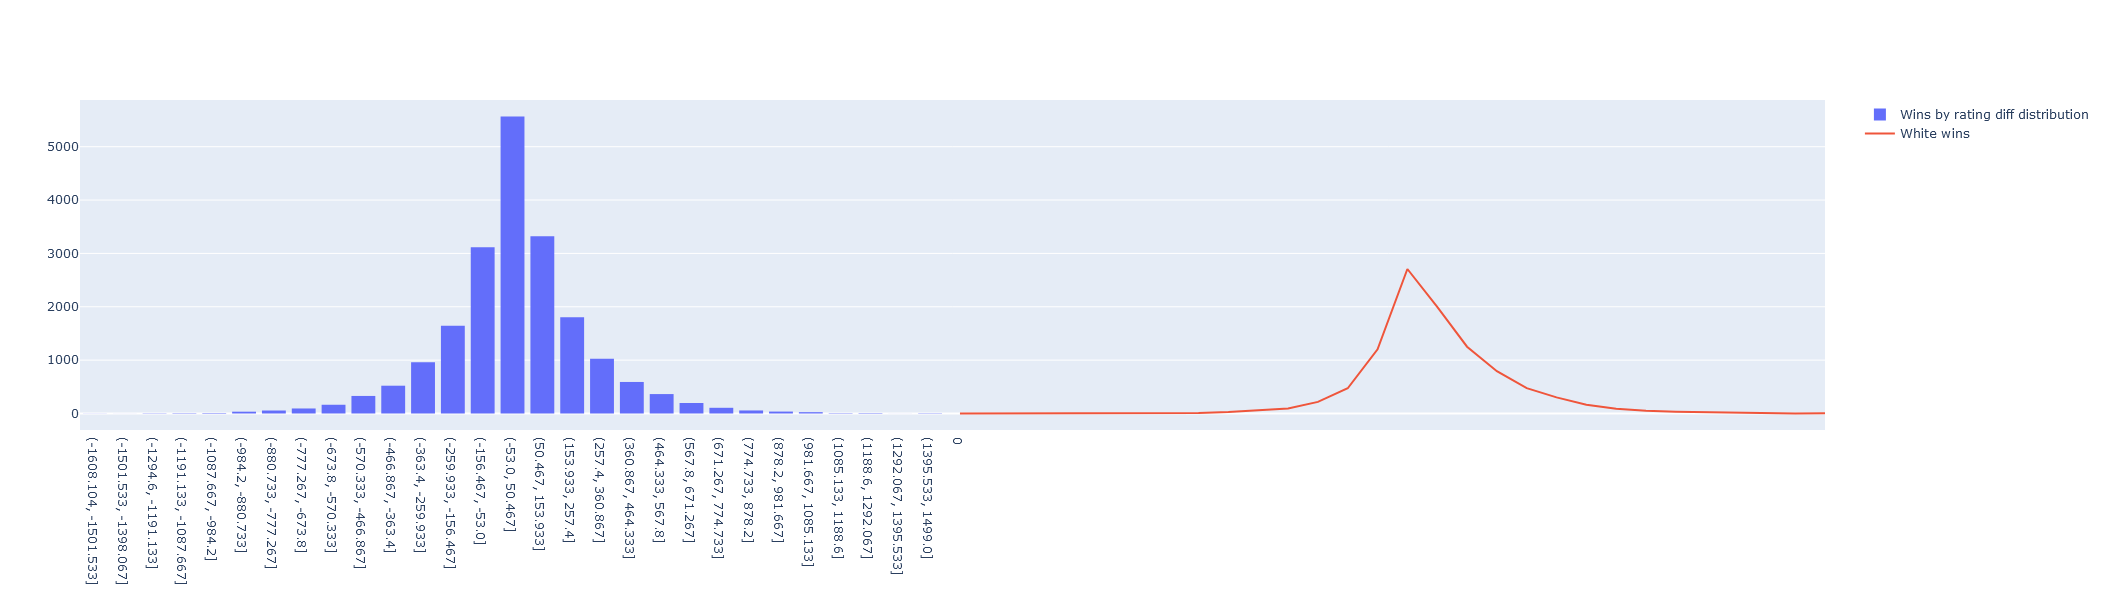

In [ ]:
df["rating_diff_cut"] = pd.cut(df["rating_diff"], bins = 30)
df["rating_diff_cut_str"] = df["rating_diff_cut"].astype(str)
ordered = df.sort_values(by="rating_diff_cut")
grouped = df.groupby(["rating_diff_cut","winner"]).size().unstack()

fig = make_subplots(1, 1)
distr = go.Histogram(x=ordered["rating_diff_cut_str"], name="Wins by rating diff distribution")
white = go.Scatter(y=ordered.groupby(["rating_diff_cut", "winner"]).size().unstack()["white"], mode="lines", name="White wins")
fig.add_trace(distr, row=1, col=1)
fig.add_trace(white, row=1, col=1)
fig.update_layout(autosize=False, width=1500, height=600)
fig.show()

## Openings
Per l'analisi dei diversi opener ho cominciato con il vedere quali sono i 10 più usati. <br>
Anche se alcuni sembrano avere lo stesso nome, in realtà sono delle varianti, quindi alcune mosse sono differenti rispetto all'opener "base".

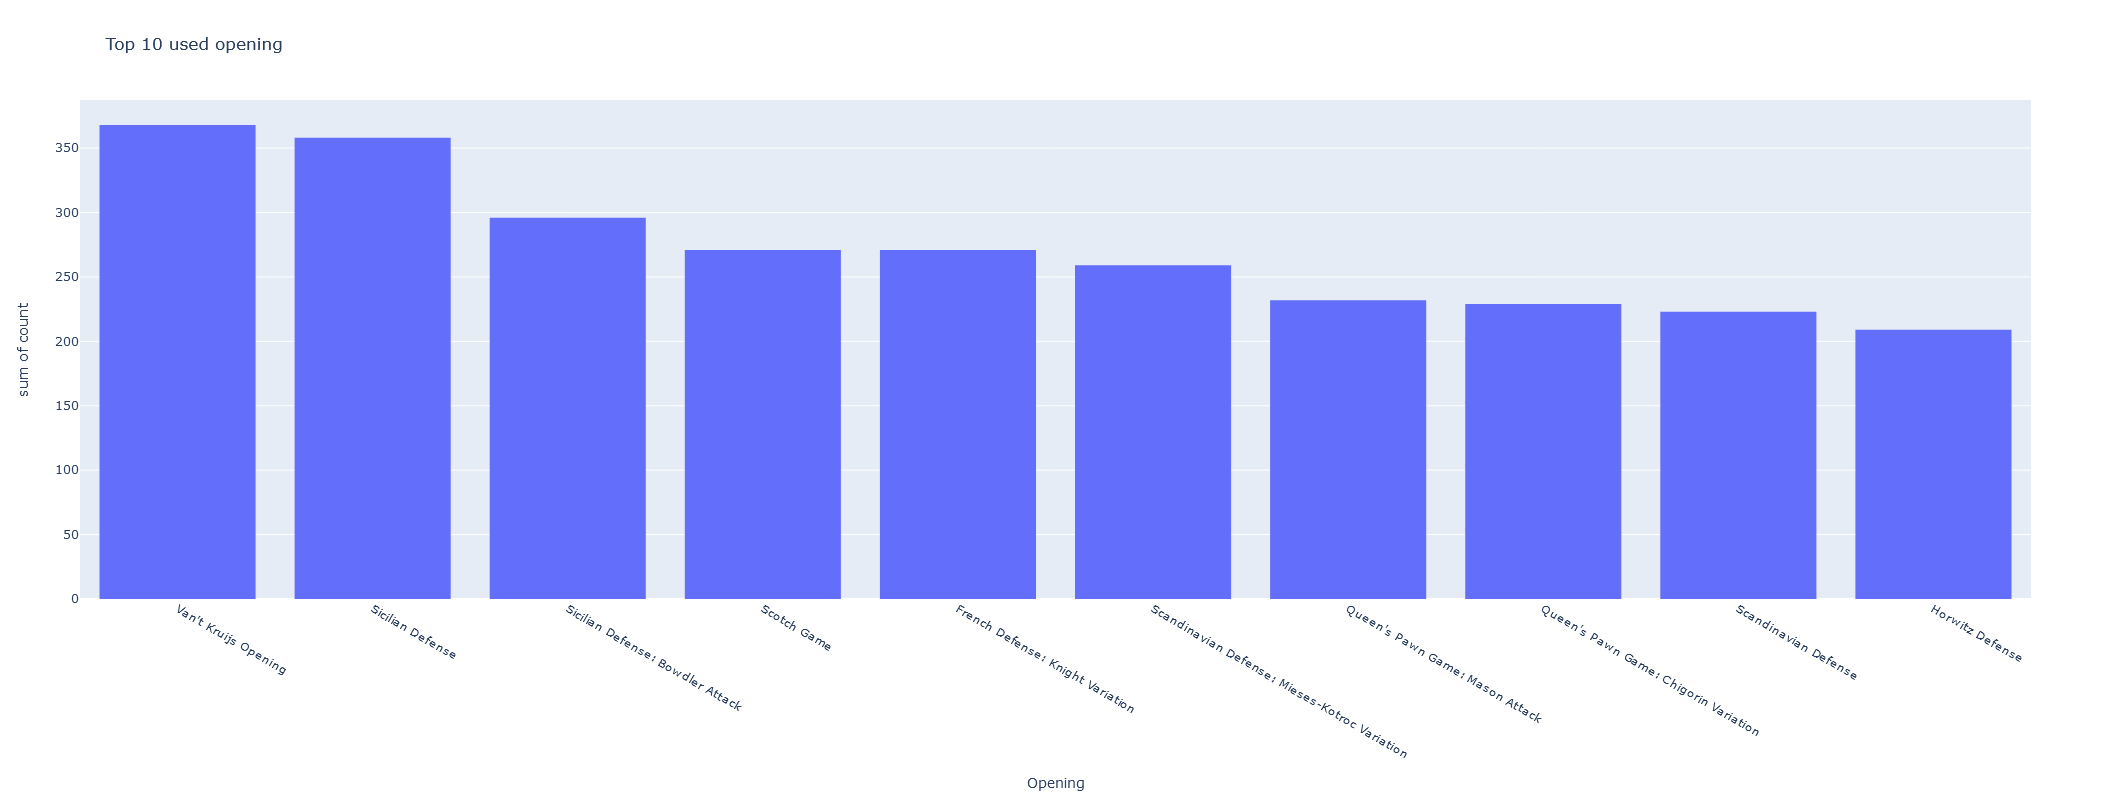

In [ ]:
popOpenings = df.groupby("opening_name")["id"].count()
popOpenings = popOpenings.sort_values(ascending=False).reset_index()
popOpenings = popOpenings.iloc[0:10]
fig = px.histogram(popOpenings, x="opening_name", y="id", labels={"id":"count", "opening_name":"Opening"}, title="Top 10 used opening")
fig.update_layout(autosize=False, width=1200, height=800, showlegend=False)
fig.show()

## Vittoria in base all'opener
Ho deciso di vedere cosa succede prendendo gli opener che vincono di più sia per bianco che per nero e mettendoli a confronto. <br>

In [ ]:
openingGb = df.groupby("opening_name")["winner"].value_counts()
openingGb = openingGb.reset_index(name="wins")
openingGb = openingGb.sort_values("wins", ascending=False)
bWins = openingGb[openingGb["winner"] == "black"]
wWins = openingGb[openingGb["winner"] == "white"]

bWinsList = list(bWins.head(8)["opening_name"])
wWinsList = list(wWins.head(8)["opening_name"])
winner = list(set(bWinsList + wWinsList))
res = []
for e in winner:
    i = openingGb[openingGb["opening_name"] == e]
    i["sum"] = i["wins"].sum().astype(int)
    i["percentage"] = i["wins"] / i["sum"]
    res.append(i) 
winProb = res[0]
for e in res[1:]:
    winProb = pd.concat([winProb, e])

<ipython-input-15-83fc6bee234d>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-83fc6bee234d>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



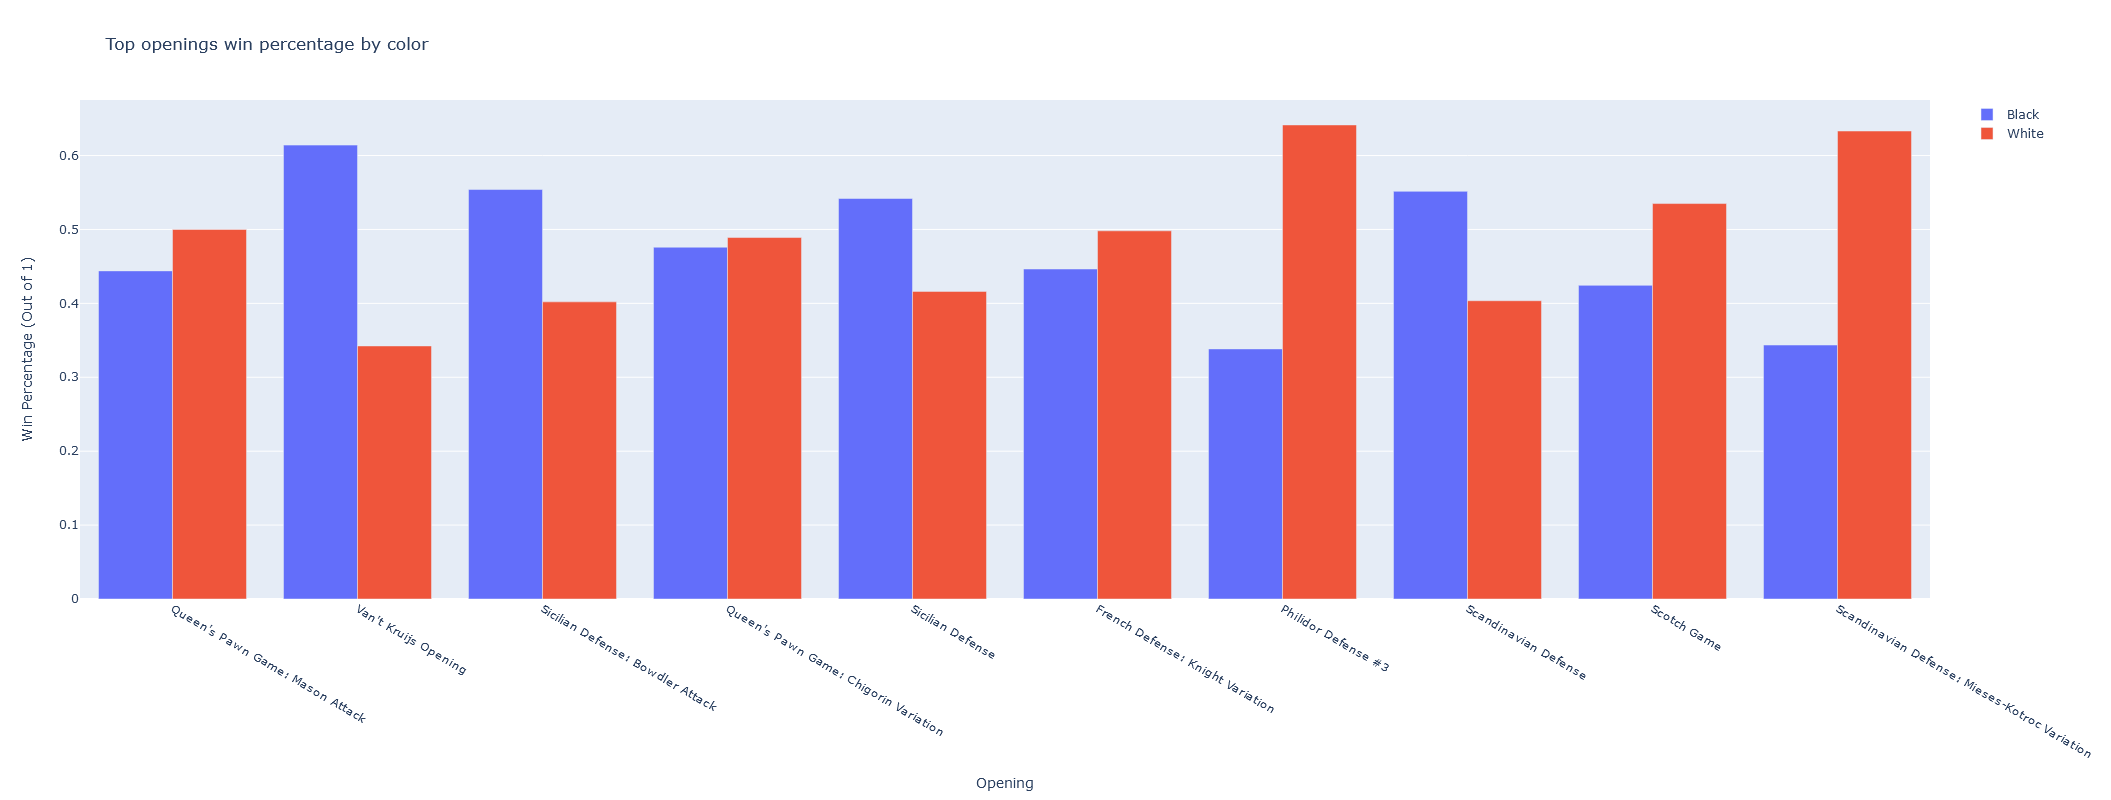

In [ ]:
xB = winProb[winProb['winner'] == 'black']["opening_name"]
yB = winProb[winProb['winner'] == 'black']["percentage"]
xW = winProb[winProb['winner'] == 'white']["opening_name"]
yW = winProb[winProb['winner'] == 'white']["percentage"]

fig = go.Figure(data=[
    go.Bar(x=xB, y=yB, name="Black"),
    go.Bar(x=xW, y=yW, name="White")
])
fig.update_layout(autosize=False, width=1600, height=800, title_text="Top openings win percentage by color")
fig['layout']['xaxis']['title'] = "Opening"
fig['layout']['yaxis']['title'] = 'Win Percentage (Out of 1)'
fig.show()